In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
dim = x_train[0].shape

(32, 32, 3)

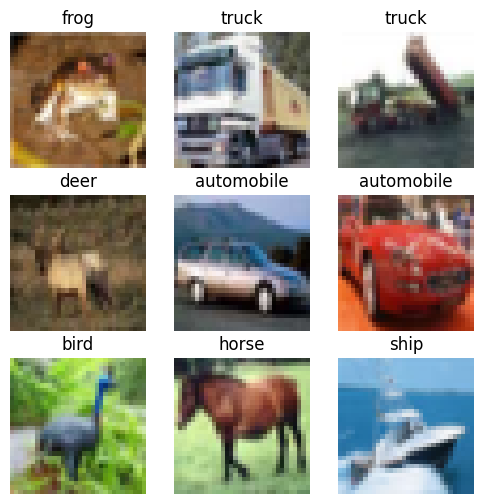

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# commented one is too slow it is alexnet
# model = models.Sequential([
#     layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape = dim),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(192, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(len(class_names), activation='softmax')
# ])

# Simpler alexnet
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1168 - loss: 4.5504 - val_accuracy: 0.1293 - val_loss: 2.2590
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1413 - loss: 2.2497 - val_accuracy: 0.1682 - val_loss: 2.1669
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1833 - loss: 2.1647 - val_accuracy: 0.2396 - val_loss: 2.0499
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2191 - loss: 2.0630 - val_accuracy: 0.2786 - val_loss: 1.9447
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2558 - loss: 1.9733 - val_accuracy: 0.3225 - val_loss: 1.8686
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2937 - loss: 1.9070 - val_accuracy: 0.3276 - val_loss: 1.8355
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3226 - loss: 1.8353 - val_accuracy: 0.2910 - val_loss: 1.9508
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3461 - loss: 1.7778 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.4282 - loss: 1.5552
Test Accuracy: 0.4282, Test Loss: 1.5552


Text(0, 0.5, 'Accuracy')

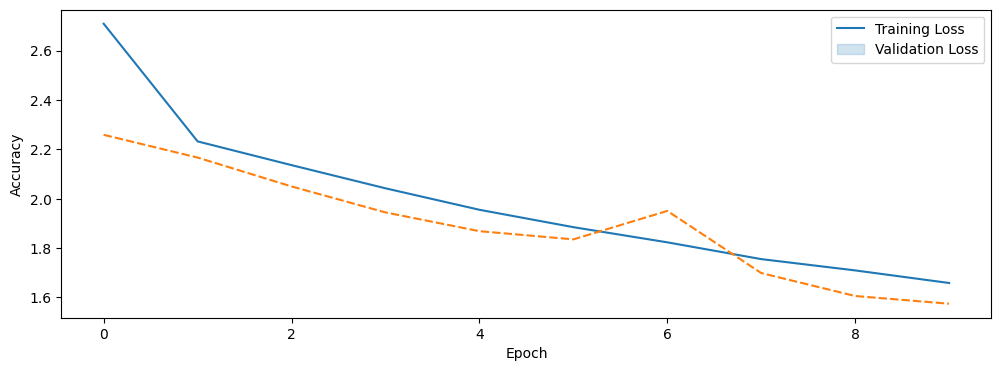

In [ ]:
plt.figure(figsize=(12, 4))

plt.plot(df['loss'], label='Training Loss')
plt.plot(df['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()


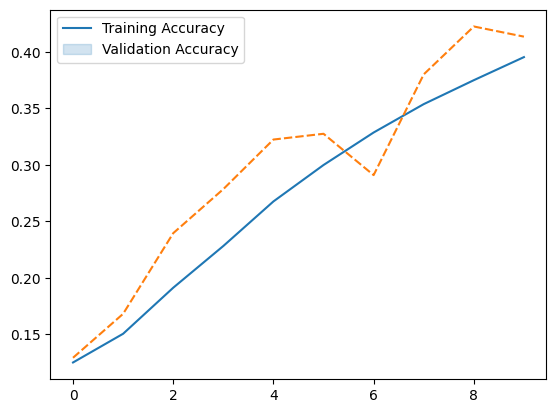

In [ ]:
plt.figure(figsize=(12, 4))

plt.plot(df['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(df['val_accuracy'], label='Validation Accuracy', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
deer


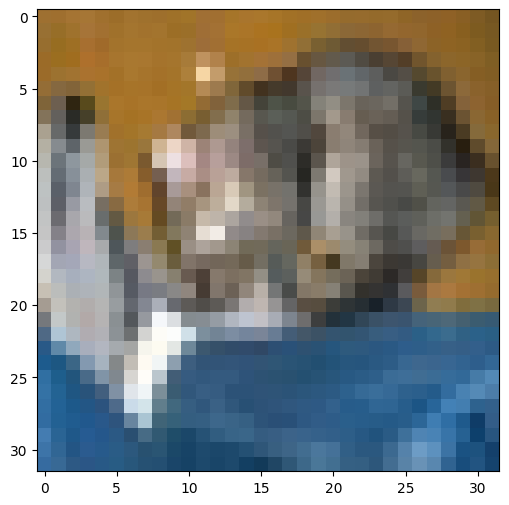

In [ ]:
img = x_test[0].astype('float32') / 255.0
pred = model.predict(np.expand_dims(img, axis=0))
print(class_names[pred.argmax()])
plt.figure(figsize=(6, 6))
plt.imshow(x_test[0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))